In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import Sequence
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [2]:
import pandas_datareader as pdr

In [3]:
import numpy as np
import pandas as pd

In [4]:
vix = pdr.data.get_data_yahoo('^VIX', start=pd.Timestamp(1999,11,19), end=pd.Timestamp(2022,11,19))['Adj Close']
vix

Date
1999-11-18    19.760000
1999-11-19    19.110001
1999-11-22    19.980000
1999-11-23    21.000000
1999-11-24    20.260000
                ...    
2022-11-14    23.730000
2022-11-15    24.540001
2022-11-16    24.110001
2022-11-17    23.930000
2022-11-18    23.120001
Name: Adj Close, Length: 5789, dtype: float64

In [5]:
input_array = vix.to_frame().values[-1000:]

class StrideData(Sequence):
    def __init__(self, x_set, y_set, lookback, stride):
        self.x, self.y = x_set, y_set
        self.lookback = lookback
        self.stride = stride

    def __len__(self):
#         print(len(self.x))
#         print(self.stride)
#         print(self.batch_size)
        return int(np.floor(((len(self.x) - self.lookback) / self.stride)))

    def __getitem__(self, idx):
        batch_x_list = [self.x[idx * self.stride + i: (idx * self.stride) + self.lookback + i] for i in range(self.stride)]
        batch_y_list = [self.y[idx * self.stride + i: (idx * self.stride) + self.lookback + i] for i in range(self.stride)]

        return np.stack(batch_x_list), np.stack(batch_y_list)
    
stride_data = StrideData(input_array[:-1], input_array[1:], lookback=252, stride=63)
stride_data.__len__()
stride_data.__getitem__(10)[0].shape # 63 samples, of 252 timestep, 1 features

(63, 252, 1)

In [6]:
opt_adam = tf.keras.optimizers.Adam()
loss_mse = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")
# loss_mae = tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error")

metric_mse = tf.keras.metrics.MeanSquaredError(
    name='mean_squared_error', dtype=None
)
metric_mae = tf.keras.metrics.MeanAbsoluteError(
    name='mean_absolute_error', dtype=None
)

# look_back_period 

model = tf.keras.Sequential()
model.add(layers.Input((60,1,)))
model.add(layers.LSTM(5))
model.add(layers.Dense(2))
model.add(layers.Dense(1))
model.compile(loss=loss_mse, optimizer=opt_adam, metrics=[metric_mse, metric_mae])

model.run_eagerly=True

stride_data = StrideData(input_array[:-1], input_array[1:], lookback=60, stride=20)

model.fit(x=stride_data, use_multiprocessing=False)

46/46 [==============================] - 12s 259ms/step - loss: 547.0991 - mean_squared_error: 547.0991 - mean_absolute_error: 21.5910


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 2)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 155
Trainable params: 155
Non-trainable params: 0
_________________________________________________________________


In [8]:
stride_data.__getitem__(0)[0][0].shape

(60, 1)

In [9]:
result = model.predict(x=stride_data.__getitem__(0)[0][0])
result

2/2 [==============================] - 0s 25ms/step


array([[0.7778144 ],
       [0.7616273 ],
       [0.7958876 ],
       [0.7981755 ],
       [0.8065656 ],
       [0.8044356 ],
       [0.80082625],
       [0.79946387],
       [0.7954079 ],
       [0.8002447 ],
       [0.810535  ],
       [0.8132019 ],
       [0.8132019 ],
       [0.8183157 ],
       [0.820447  ],
       [0.8242801 ],
       [0.82075584],
       [0.8202866 ],
       [0.8182586 ],
       [0.8128296 ],
       [0.8065313 ],
       [0.81290025],
       [0.7990886 ],
       [0.7991828 ],
       [0.7944254 ],
       [0.79158676],
       [0.788556  ],
       [0.7788261 ],
       [0.7856114 ],
       [0.78212184],
       [0.7853974 ],
       [0.7777291 ],
       [0.7754554 ],
       [0.7962032 ],
       [0.78868765],
       [0.7843097 ],
       [0.77193254],
       [0.78416246],
       [0.7860361 ],
       [0.77418596],
       [0.76310384],
       [0.75808144],
       [0.75290453],
       [0.75077486],
       [0.7481616 ],
       [0.7608174 ],
       [0.7527734 ],
       [0.755

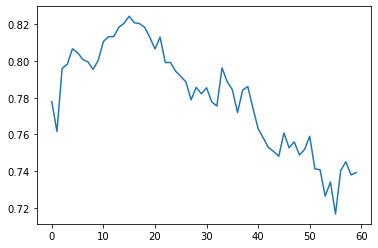

In [12]:
plt.plot(result)

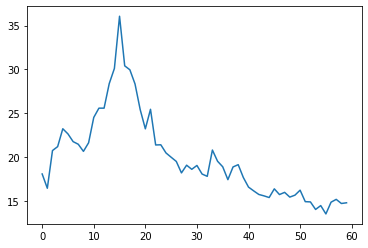

In [13]:
plt.plot(stride_data.__getitem__(0)[0][0])